<a href="https://colab.research.google.com/github/MaxiPerrone/deep-learning/blob/main/6_Perceptron_multi_capa_clasificacion_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [2]:
import pandas as pd

df = pd.DataFrame(mnist.data)
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3)

In [4]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic', solver='sgd')
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), solver='sgd')

In [5]:
model.n_layers_

3

In [6]:
model.n_outputs_

10

In [10]:
784 * 50 + 50

1960000

In [7]:
model.coefs_ # Número de parametros que forman el modelo

[array([[-0.03528575,  0.00570475,  0.00954902, ...,  0.00681177,
         -0.03358144,  0.03993664],
        [-0.02639865, -0.00963539,  0.01954154, ..., -0.00448751,
         -0.02964711, -0.001994  ],
        [ 0.01742681, -0.03836715,  0.02847317, ...,  0.03749077,
          0.00428994, -0.02146085],
        ...,
        [ 0.0238846 ,  0.04003169,  0.00693719, ..., -0.02778593,
         -0.02451951, -0.02214698],
        [-0.00031108,  0.04806547, -0.03153231, ...,  0.04395865,
          0.02946368, -0.04228896],
        [-0.03274806, -0.02907996, -0.03603318, ...,  0.03461643,
         -0.04323649,  0.00847822]]),
 array([[ 4.66876989e-01,  3.56983791e-02, -7.65998271e-02,
          5.20402565e-01, -8.35799387e-01,  3.45228626e-02,
         -6.44890233e-01,  1.08731745e-01, -5.91790090e-01,
          7.19779612e-01],
        [ 4.75295783e-01,  4.47827477e-01, -7.11689128e-01,
          3.87176789e-01, -7.26761175e-01,  6.68606327e-01,
         -1.69481638e-01, -4.36844909e-01,  5.

In [8]:
model.coefs_[0].shape

(784, 50)

In [9]:
model.coefs_[1].shape

(50, 10)

In [13]:
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.9447795768654624

In [14]:
index = 0
errors = []

for label, predict in zip(y_test, y_pred):
  if label != predict:
    errors.append(index)
  index += 1

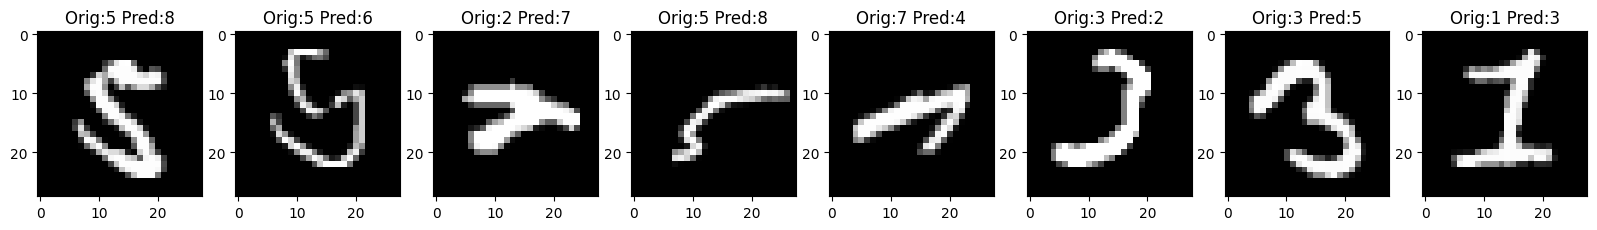

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for i, img_index in zip(range(1, 9), errors):
    plt.subplot(1, 8, i)
    plt.imshow(np.reshape(X_test.iloc[img_index], (28,28)), cmap=plt.cm.gray)
    plt.title('Orig:' + str(y_test.iloc[img_index]) + ' Pred:' + str(y_pred[img_index]))
plt.show()

In [17]:
from sklearn.neural_network import MLPClassifier

model65 = MLPClassifier(hidden_layer_sizes=(65,), activation='logistic', solver='sgd')
model65.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(65,), solver='sgd')

In [18]:
y_pred = model65.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.9506345074834216

In [19]:
from sklearn.neural_network import MLPClassifier

model10 = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='sgd')
model10.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), solver='sgd')

In [20]:
y_pred = model10.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.8782421384718585